# ICMR EDA: Rishika

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'geopandas'

In [5]:
df=pd.read_csv('ICMR.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lab      267 non-null    object
 1   address  267 non-null    object
 2   pincode  267 non-null    int64 
 3   city     267 non-null    object
 4   state    267 non-null    object
 5   type     267 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.6+ KB


In [8]:
df.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [10]:
print(df.isnull().any())

lab        False
address    False
pincode    False
city       False
state      False
type       False
dtype: bool


In [11]:
#no null values in the dataset

In [25]:
#no of various states:
df['state'].nunique()

34

In [119]:
#No. of various types of labs:
df['type'].value_counts()

Government Laboratory    182
Private Laboratory        82
Collection Site            3
Name: type, dtype: int64

C:\Users\ypanw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

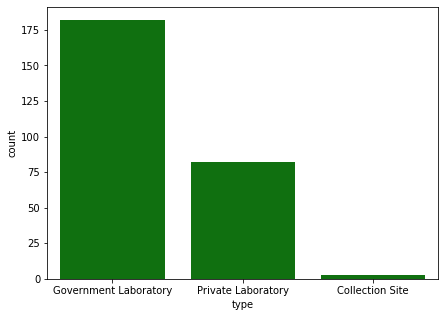

In [223]:
 ax = plt.subplots(figsize = (7,5))
sns.countplot(df['type'], order=df['type'].value_counts().index, color='green')

In [76]:
#the state with the max no of labs:
a=df.groupby('state')['type'].value_counts().nlargest(n=5)
a

state          type                 
Maharashtra    Government Laboratory    20
               Private Laboratory       19
Tamil Nadu     Government Laboratory    16
Uttar Pradesh  Government Laboratory    15
Karnataka      Government Laboratory    12
Name: type, dtype: int64

Text(0.5, 1.0, 'States with max no of labs')

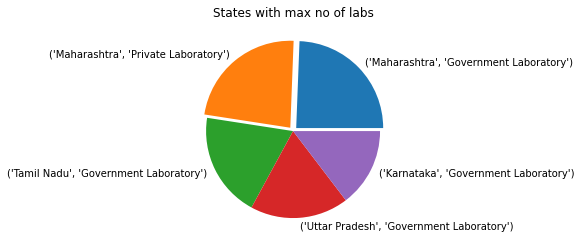

In [85]:
plt.pie(a, labels=a.index, explode=[0.05,0.05,0,0,0])
plt.title('States with max no of labs')

In [156]:
#creating a dataset for government labs
labs=df[df['type']=='Government Laboratory']

Text(0.5, 1.0, 'state wise')

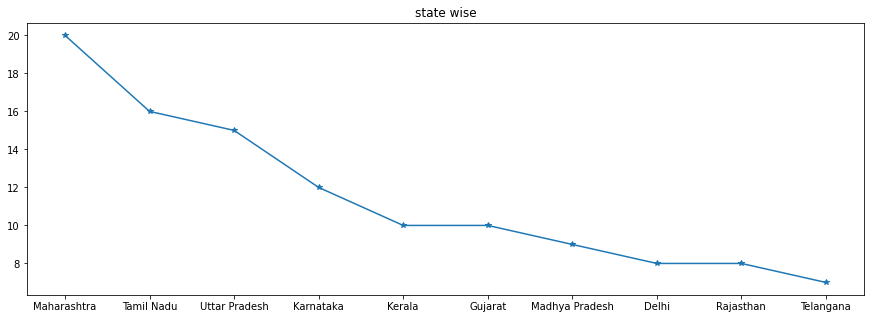

In [193]:
#Distribution of labs acc to states (top 10)

x=labs.state.value_counts().head(10)
ax=plt.figure(figsize=(15,5))
plt.plot(x.index, x, marker='*')
plt.title('state wise')


In [245]:
#Collection sites
b=df[df['type']=='Collection Site']['state']
b

1      Arunachal Pradesh
111               Ladakh
187               Sikkim
Name: state, dtype: object

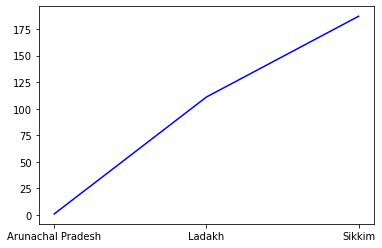

In [197]:
plt.plot(b, b.index, color='Blue')

C:\Users\ypanw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='state'>

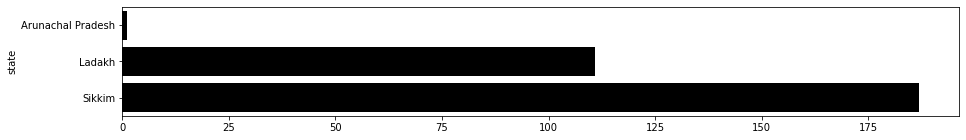

In [244]:
plt.figure(figsize=(15,2))
sns.barplot(b.index,b, color='black')

C:\Users\ypanw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

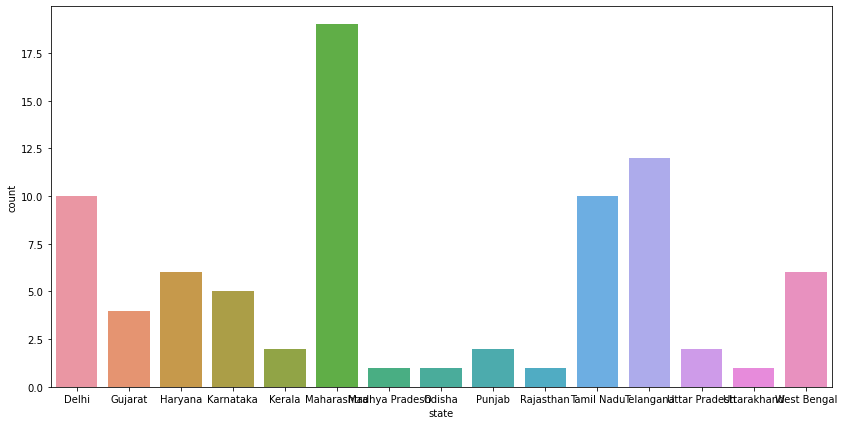

In [177]:
#Private labs
c=df[df['type']=='Private Laboratory']['state']
ax=plt.figure(figsize=(14,7))
sns.countplot(c)

In [269]:
#states with least no of labs where govt can introduce new labs:
df.groupby('state')['type'].value_counts().nsmallest(n=15)

state                                     type                 
Andaman and Nicobar Islands               Government Laboratory    1
Arunachal Pradesh                         Collection Site          1
Dadra and Nagar Haveli and Daman and Diu  Government Laboratory    1
Goa                                       Government Laboratory    1
Ladakh                                    Collection Site          1
Madhya Pradesh                            Private Laboratory       1
Meghalaya                                 Government Laboratory    1
Mizoram                                   Government Laboratory    1
Odisha                                    Private Laboratory       1
Puducherry                                Government Laboratory    1
Rajasthan                                 Private Laboratory       1
Sikkim                                    Collection Site          1
Tripura                                   Government Laboratory    1
Uttarakhand                            

In [215]:
import sys
'geopandas' in sys.modules

False

In [216]:
pip install geopandas

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\ypanw\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ypanw\\AppData\\Local\\Temp\\pip-install-dmfuslau\\fiona_6247f640c0be4e8a88c04e435a6e9d72\\setup.py'"'"'; __file__='"'"'C:\\Users\\ypanw\\AppData\\Local\\Temp\\pip-install-dmfuslau\\fiona_6247f640c0be4e8a88c04e435a6e9d72\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\ypanw\AppData\Local\Temp\pip-pip-egg-info-gusuefle'
         cwd: C:\Users\ypanw\AppData\Local\Temp\pip-install-dmfuslau\fiona_6247f640c0be4e8a88c04e435a6e9d72\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
    ERRO


  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached Fiona-1.8.16.tar.gz (1.3 MB)
  Using cached Fiona-1.8.15.tar.gz (1.3 MB)
  Using cached Fiona-1.8.14.tar.gz (1.3 MB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.13.tar.gz (1.2 MB)
  Using cached Fiona-1.8.12.tar.gz (1.2 MB)
  Using cached Fiona-1.8.11.tar.gz (1.2 MB)
  Using cached Fiona-1.8.10.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.tar.gz (1.2 MB)
  Using cached Fiona-1.8.8.tar.gz (1.7 MB)
  Using cached Fiona-1.8.7.tar.gz (1.7 MB)
  Using cached Fiona-1.8.6.tar.gz (1.7 MB)
  Using cached Fiona-1.8.5.tar.gz (1.7 MB)
  Using cached Fiona-1.8.4.tar.gz (1.1 MB)
  Using cached Fiona-1.8.3.tar.gz (1.1 MB)
  Us

    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\ypanw\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ypanw\\AppData\\Local\\Temp\\pip-install-dmfuslau\\fiona_e9469071dfa849789f874b2c4dac4924\\setup.py'"'"'; __file__='"'"'C:\\Users\\ypanw\\AppData\\Local\\Temp\\pip-install-dmfuslau\\fiona_e9469071dfa849789f874b2c4dac4924\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\ypanw\AppData\Local\Temp\pip-pip-egg-info-zchw0_gj'
         cwd: C:\Users\ypanw\AppData\Local\Temp\pip-install-dmfuslau\fiona_e9469071dfa849789f874b2c4dac4924\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----

In [217]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'